In [1]:
from snowflake.snowpark.session import Session
import snowflake.snowpark.functions as F
from dotenv import load_dotenv
import pandas as pd
import os
import sys

## ESTABLISHING A CONNECTION TO SNOWFLAKE DB

In [5]:
# Load environment variables from .env file
load_dotenv()

connection_params = {
    'user': os.getenv("SF_USER"),
    'password': os.getenv("SF_PASSWORD"),
    'account': os.getenv("SF_ACCOUNT"),
    'warehouse': os.getenv("SF_WAREHOUSE"),
    'database': os.getenv("SF_DATABASE"),
}

{'user': 'FINAL_PROJECT', 'password': '9T2EEN8xaZZP7b', 'account': 'EQSMEMD-BOOTCAMP', 'warehouse': 'MY_WH', 'database': 'COVID19_EPIDEMIOLOGICAL_DATA'}


In [6]:
def snowflake_connector():
    try:
        session = Session.builder.configs(connection_params).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session

In [8]:
session = snowflake_connector()
session.sql('USE ROLE ACCOUNTADMIN').collect() # Needed to modify tables
session.sql('USE DATABASE COVID19_EPIDEMIOLOGICAL_DATA').collect()
session.sql('USE schema PUBLIC').collect()

connection successful!


[Row(status='Statement executed successfully.')]

In [9]:
tables = pd.DataFrame(session.sql('SHOW TABLES').collect())

tables[['name', 'rows', 'comment']]
#session.sql('SHOW TABLES').collect()


,name,rows,comment
0,APPLE_MOBILITY,3851311,
1,CDC_INPATIENT_BEDS_ALL,1581,
2,CDC_INPATIENT_BEDS_COVID_19,1581,
3,CDC_INPATIENT_BEDS_ICU_ALL,1581,
4,CDC_POLICY_MEASURES,4217,
5,CDC_REPORTED_PATIENT_IMPACT,48881,
6,CDC_TESTING,50107,
7,CT_US_COVID_TESTS,20780,US COVID-19 testing and mortality
8,DATABANK_DEMOGRAPHICS,216,
9,DEMOGRAPHICS,3140,"Demographic data, 2019"


Here is a screenshor of the dataset description from the official source:
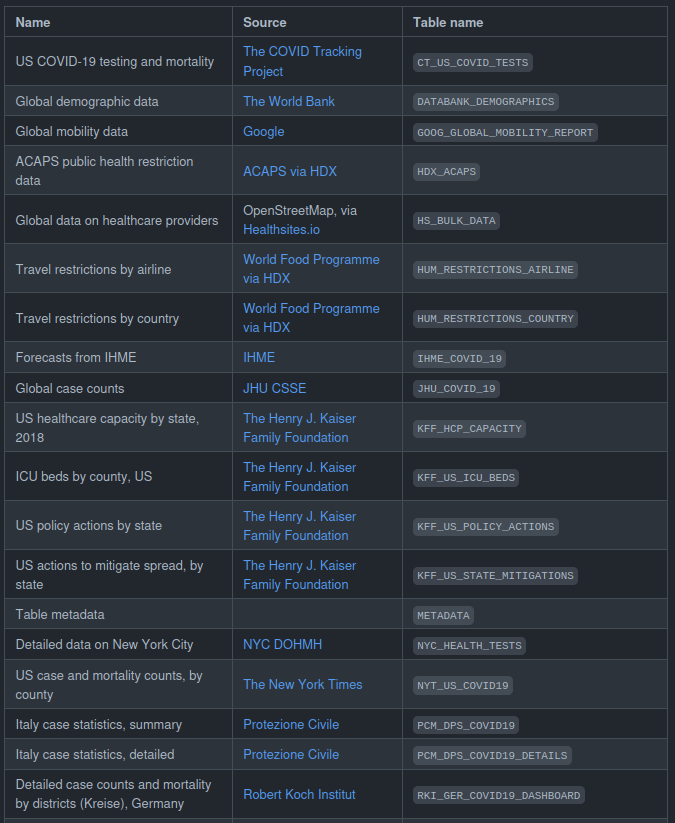
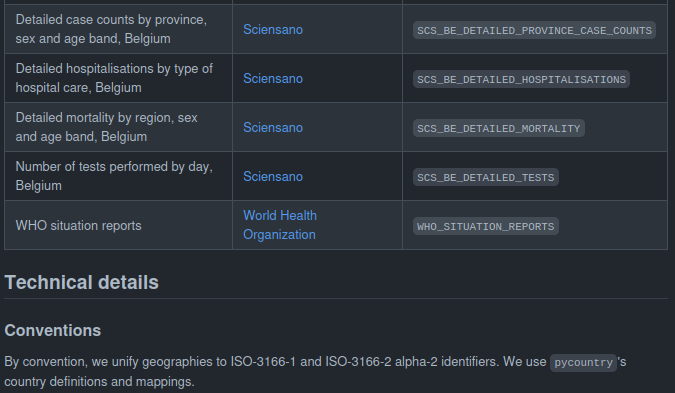

As seen, many datasets are country specific. To develop a unified platform, untilising all datasets present in the source, it would take lots of time and require a very though-out design to make it make sence to the end-user.

Therefore in this work, only datasets providing data on a global scale will be used. Hence, only a part of tables will be analysed here.

From tables, that countain global data, also only a part will be selected, since some datasets posess simillar information (possible duplicates were met during examinations). From those datasets, having simillar structure and information, will be chosen that which has maximal number of useful features (columns) and covers more geographic areas.

## SELECTION OF DATA TABLES USED FOR API

In [10]:
#APPLE_MOBILITY = pd.DataFrame(session.table('APPLE_MOBILITY').collect())

session.sql('select * from APPLE_MOBILITY limit 30').show()

session.sql("select MAX(DATE) as Latest_record, \
        MIN(DATE) as Oldest_record, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from APPLE_MOBILITY").show()

session.sql('select distinct TRANSPORTATION_TYPE from APPLE_MOBILITY limit 30').show()


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"PROVINCE_STATE"  |"DATE"      |"TRANSPORTATION_TYPE"  |"DIFFERENCE"  |"ISO3166_1"  |"ISO3166_2"  |"LAST_UPDATED_DATE"         |"LAST_REPORTED_FLAG"  |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Lausanne          |Canton of Vaud    |2021-11-03  |driving                |148.25        |CH           |VD           |2022-04-14 00:05:44.939612  |False                 |
|Lausanne          |Canton of Vaud    |2021-11-03  |transit                |168.12        |CH           |VD           |2022-04-14 00:05:44.939612  |False                 |
|Lausanne          |Canton of Vaud    |2021-11-03  |walking                |155.45        |CH           |VD           |2022-04-14 00:05:44.9

In [11]:
session.sql('select * from DATABANK_DEMOGRAPHICS limit 30').show()

session.sql("select COUNT(distinct ISO3166_1) AS Unique_geographic_areas from DATABANK_DEMOGRAPHICS").show()

#DEMOGRAPHICS table is the same but for US states.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"ISO3166_1"  |"ISO3166_2"  |"FIPS"  |"LATITUDE"  |"LONGITUDE"  |"STATE"  |"COUNTY"  |"TOTAL_POPULATION"  |"TOTAL_MALE_POPULATION"  |"TOTAL_FEMALE_POPULATION"  |"COUNTRY_REGION"     |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|AF           |NULL         |NULL    |33.0        |65.0         |NULL     |NULL      |37172386            |19093281                 |18079105                   |Afghanistan          |
|AL           |NULL         |NULL    |41.0        |20.0         |NULL     |NULL      |2866376             |1460043                  |1406333                    |Albania              |
|DZ           |NULL         |NULL    |28.0        |3.0          |NULL     |NULL 

In [12]:
session.sql('select * from ECDC_GLOBAL limit 30').show()

session.sql("select MAX(DATE) as Latest_record, \
        MIN(DATE) as Oldest_record, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from ECDC_GLOBAL").show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"CONTINENTEXP"  |"ISO3166_1"  |"CASES"  |"DEATHS"  |"CASES_SINCE_PREV_DAY"  |"DEATHS_SINCE_PREV_DAY"  |"POPULATION"  |"DATE"      |"LAST_UPDATE_DATE"          |"LAST_REPORTED_FLAG"  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Afghanistan       |Asia            |AF           |746.0    |6.0       |0.0                     |0.0                      |38041757.0    |2020-12-14  |2023-08-28 00:03:55.528601  |True                  |
|Afghanistan       |Asia            |AF           |298.0    |9.0       |-448.0                  |3.0                      |38041757.0    |2020-12-13  |2023-08-28 00:03:55.528601  |Fals

In [13]:
session.sql('select * from ECDC_GLOBAL_WEEKLY limit 30').show()

session.sql("select COUNT(distinct ISO3166_1) AS Unique_geographic_areas from ECDC_GLOBAL_WEEKLY").show()


#Week format may not be handy

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"CONTINENTEXP"  |"ISO3166_1"  |"CASES_WEEKLY"  |"DEATHS_WEEKLY"  |"CASES_SINCE_PREV_WEEK"  |"DEATHS_SINCE_PREV_WEEK"  |"POPULATION"  |"DATE"      |"LAST_UPDATE_DATE"          |"LAST_REPORTED_FLAG"  |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Austria           |Europe          |AT           |NULL            |NULL             |0.0                      |0.0                       |8978929.0     |2020-01-06  |2023-08-28 00:04:12.505437  |False                 |
|Austria           |Europe          |AT           |NULL            |NULL             |0.0                      |0.0     

In [14]:
#session.sql('GRANT ALL PRIVILEGES ON DATABASE COVID19_EPIDEMIOLOGICAL_DATA TO ROLE ACCOUNTADMIN').show()
#session.sql('ALTER TABLE GOOG_GLOBAL_MOBILITY_REPORT RENAME COLUMN ISO_3166_1 TO ISO3166_1').show()

#NOTICE THE COLUMN NAME!
session.sql('select * from GOOG_GLOBAL_MOBILITY_REPORT limit 30').show()


session.sql("select MAX(DATE) as Latest_record, \
        MIN(DATE) as Oldest_record, \
        count(distinct ISO_3166_1) AS Unique_geographic_areas \
        from GOOG_GLOBAL_MOBILITY_REPORT").show()


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"PROVINCE_STATE"  |"ISO_3166_1"  |"ISO_3166_2"  |"DATE"      |"GROCERY_AND_PHARMACY_CHANGE_PERC"  |"PARKS_CHANGE_PERC"  |"RESIDENTIAL_CHANGE_PERC"  |"RETAIL_AND_RECREATION_CHANGE_PERC"  |"TRANSIT_STATIONS_CHANGE_PERC"  |"WORKPLACES_CHANGE_PERC"  |"LAST_UPDATE_DATE"          |"LAST_REPORTED_FLAG"  |"SUB_REGION_2"     |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
session.sql('select * from HDX_ACAPS limit 30').show()

session.sql("select MAX(ENTRY_DATE) as Latest_entry, \
        MIN(ENTRY_DATE) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from HDX_ACAPS").show()

session.sql("select distinct CATEGORY AS Unique_Categories from HDX_ACAPS").show()




-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_STATE"  |"ADMIN_2"  |"REGION"  |"CATEGORY"                              |"MEASURE"                                           |"TARGETED_POP_GROUP"  |"COMMENTS"                                          |"NON_COMPLIANCE"  |"DATE_IMPLEMENTED"  |"SOURCE"          |"SOURCE_TYPE"  |"LINK"                                              |"ENTRY_DATE"  |"ISO3166_1"  |"LAST_UPDATED_DATE"         |"LOG_TYPE"                            |
----------------------------------------------------------------------------------------------------------------------------

In [16]:
session.sql('select * from HUM_RESTRICTIONS_AIRLINE limit 30').show()

session.sql("select MAX(PUBLISHED) as Latest_entry, \
        MIN(PUBLISHED) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from HUM_RESTRICTIONS_AIRLINE").show()


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY"    |"ISO3166_1"  |"LONG"     |"LAT"       |"PUBLISHED"  |"SOURCES"                                           |"AIRLINE"                |"RESTRICTION_TEXT"                                  |"LAST_UPDATE_DATE"          |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Afghanistan  |AF           |66.026881  |33.831602   |2022-10-17   |https://pajhwok.com/2022/10/17/after-year-long-...  |Ariana Afghana Airlines  |After year-long hiatus, Ariana Afghan Airlines ...  |2023-08-28 00:03:53.796664  |
|Afghanistan  |AF           |66.026881  |33.831602   |2022-10-28   |https://tolo

In [17]:
session.sql('select * from HUM_RESTRICTIONS_COUNTRY limit 5').show()

session.sql("select MAX(PUBLISHED) as Latest_entry, \
        MIN(PUBLISHED) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from HUM_RESTRICTIONS_COUNTRY").show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY"       |"ISO3166_1"  |"LONG"      |"LAT"       |"PUBLISHED"  |"SOURCES"                                           |"RESTRICTION_TEXT"                                  |"INFO_DATE"  |"QUARANTINE_TEXT"                                   |"LAST_UPDATE_DATE"          |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Afghanistan     |AF           |66.026881   |33.831602   |2021-05-21   |<a href="https://www.gov.uk/foreign-travel-advi...  |Latest News: !!!                                  

---------------------------------------------------------------
|"LATEST_ENTRY"  |"OLDEST_ENTRY"  |"UNIQUE_GEOGRAPHIC_AREAS"  |
---------------------------------------------------------------
|2021-05-26      |2020-02-05      |230                        |
---------------------------------------------------------------



In [18]:

session.sql('select * from JHU_COVID_19 limit 30').show()

session.sql("select distinct CASE_TYPE AS Unique_case_types from JHU_COVID_19_TIMESERIES ").show()

session.sql("select MAX(DATE) as Latest_entry, \
        MIN(DATE) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from JHU_COVID_19").show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"PROVINCE_STATE"  |"COUNTY"    |"FIPS"  |"DATE"      |"CASE_TYPE"  |"CASES"  |"LONG"        |"LAT"        |"ISO3166_1"  |"ISO3166_2"  |"DIFFERENCE"  |"LAST_UPDATED_DATE"         |"LAST_REPORTED_FLAG"  |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|United States     |Wisconsin         |Green Lake  |55047   |2021-09-15  |Deaths       |28       |-89.04679553  |43.80025981  |US           |WI           |0             |2023-03-23 15:02:04.173620  |False                 |
|United States     |Wisconsin         |Green Lake  |55047   |2021-09-16  |Deaths       |28       |-89.046795

In [19]:
session.sql('select * from JHU_COVID_19_TIMESERIES limit 30').show()

session.sql("select distinct CASE_TYPE AS Unique_case_types from JHU_COVID_19_TIMESERIES ").show()

session.sql("select MAX(DATE) as Latest_entry, \
        MIN(DATE) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from JHU_COVID_19_TIMESERIES").show()


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"PROVINCE_STATE"  |"COUNTY"    |"FIPS"  |"LAT"               |"LONG"              |"ISO3166_1"  |"ISO3166_2"  |"DATE"      |"CASES"  |"CASE_TYPE"  |"LAST_UPDATE_DATE"          |"LAST_REPORTED_FLAG"  |"DIFFERENCE"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|United States     |Kentucky          |Wolfe       |21237   |37.73941626         |-83.49303612        |US           |KY           |2022-10-03  |30.0     |Deaths       |2023-03-10 05:04:44.594338  |False                 |0             |
|United States     |Kentucky          |Woodford    |2123

In [20]:
session.sql('select * from JHU_DASHBOARD_COVID_19_GLOBAL limit 30').show()


session.sql("select MAX(DATE) as Latest_entry, \
        MIN(DATE) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from JHU_DASHBOARD_COVID_19_GLOBAL").show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"     |"PROVINCE_STATE"              |"COUNTY"  |"FIPS"  |"DATE"      |"ACTIVE"  |"PEOPLE_TESTED"  |"CONFIRMED"  |"PEOPLE_HOSPITALIZED"  |"DEATHS"  |"RECOVERED"  |"INCIDENT_RATE"   |"TESTING_RATE"  |"HOSPITALIZATION_RATE"  |"MORTALITY_RATE"  |"LONG"     |"LAT"     |"ISO3166_1"  |"ISO3166_2"  |"LAST_UPDATE_DATE"          |"LAST_REPORTED_FLAG"  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:

session.sql('select * from OWID_VACCINATIONS limit 30').show()

session.sql("select MAX(DATE) as Latest_entry, \
        MIN(DATE) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from OWID_VACCINATIONS").show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"DATE"      |"COUNTRY_REGION"  |"ISO3166_1"  |"TOTAL_VACCINATIONS"  |"PEOPLE_VACCINATED"  |"PEOPLE_FULLY_VACCINATED"  |"DAILY_VACCINATIONS_RAW"  |"DAILY_VACCINATIONS"  |"TOTAL_VACCINATIONS_PER_HUNDRED"  |"PEOPLE_VACCINATED_PER_HUNDRED"  |"PEOPLE_FULLY_VACCINATED_PER_HUNDRED"  |"DAILY_VACCINATIONS_PER_MILLION"  |"VACCINES"                                          |"LAST_OBSERVATION_DATE"  |"SOURCE_NAME"              |"SOURCE_WEBSITE"          |"LAST_UPDATE_DATE"          |"LAST_REPORTED_FLAG"  

In [22]:

session.sql('select * from WHO_TIMESERIES limit 30').show()

session.sql("select MAX(DATE) as Latest_entry, \
        MIN(DATE) as Oldest_entry, \
        count(distinct ISO3166_1) AS Unique_geographic_areas \
        from WHO_TIMESERIES").show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"    |"CASES_TOTAL"  |"CASES_TOTAL_PER_100000"  |"CASES"  |"DEATHS_TOTAL"  |"DEATHS_TOTAL_PER_100000"  |"DEATHS"  |"TRANSMISSION_CLASSIFICATION"  |"DATE"               |"ISO3166_1"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Global              |112649371      |1443.0551881926956        |427644   |2501229         |32.04111530554421          |10093     |NULL                           |2021-02-27 00:00:00  |NULL         |
|United States       |28028815       |8467.85                   |73477    |501414          |151.48                     |2397      |Community transmission         |2021-02-27 00:00:00  |US           |


Final words:
* HS_BULK_DATA is unusable
* IHME_COVID_19 is forecasting datase, hardly informatove for this case
* JHU_COVID_19_TIMESERIES and JHU_COVID_19 can be omitted if JHU_DASHBOARD_COVID_19_GLOBAL will be used
* WHO datasets provide very limited time span and will be difficult to manage along with other data.
* From ECDC_GLOBAL and ECDC_GLOBAL_WEEKLY the first dataset will be used, since its more comfortable to operate with more granular (spread by days not weeks) data.

### DATA PREPROCESSING

1. Creating new DB to store data that will be used (needed to have priviledges to alter and create)
2. Combibning Apple and Google mobility data together since I assume they will be used together anyway
2. Loading one more dataset
3. Creating other views

In [23]:
#Create new DB
session.sql("CREATE DATABASE COVID_19_DB").collect()
session.sql("USE DATABASE COVID_19_DB").collect()



[Row(status='Statement executed successfully.')]

In [55]:
# Creating view of mobility data
session.sql("CREATE OR REPLACE SECURE VIEW MOBILITY_DATA AS \
    SELECT a.COUNTRY_REGION, a.iso3166_1, a.transportation_type, \
    a.difference, g.grocery_and_pharmacy_change_perc, g.parks_change_perc, \
    g.residential_change_perc, g.retail_and_recreation_change_perc, \
    g.transit_stations_change_perc, g.workplaces_change_perc, \
    g.date \
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.GOOG_GLOBAL_MOBILITY_REPORT g \
    full JOIN COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.APPLE_MOBILITY a \
    on a.ISO3166_1=g.iso_3166_1 and a.date=g.date;").collect()

#Verification of successful view creation
session.sql("select * from MOBILITY_DATA limit 10").show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"COUNTRY_REGION"  |"ISO3166_1"  |"TRANSPORTATION_TYPE"  |"DIFFERENCE"  |"GROCERY_AND_PHARMACY_CHANGE_PERC"  |"PARKS_CHANGE_PERC"  |"RESIDENTIAL_CHANGE_PERC"  |"RETAIL_AND_RECREATION_CHANGE_PERC"  |"TRANSIT_STATIONS_CHANGE_PERC"  |"WORKPLACES_CHANGE_PERC"  |"DATE"      |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Wood County       |US           |driving                |170.42        |16.0                                |38.0                 |2.0                        |-1.0                    

### Preprocessing new dataset about covid-19 related exposure by countrues

In [56]:
exposure_df = pd.read_csv('../additional_data/exposure.csv', sep=';', encoding="latin-1")

/tmp/ipykernel_37450/337682429.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  exposure_df = pd.read_csv('../additional_data/exposure.csv', sep=';', encoding="latin-1")


In [57]:
exposure_df.head()

,country,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,...,tourism dependence,General government gross debt Percent of GDP 2019,Government indeptedness,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import
0,Liechtenstein,No,HIC,No data,x,No data,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
1,Eritrea,No,LIC,No data,x,No data,x,x,x,x,...,x,"165,1","10,0",x,x,x,x,"10,0","10,0","10,0"
2,Bahrain,No,HIC,No data,x,No data,x,"9,4","3,7","76,2",...,"3,9","101,7","10,0","0,88","10,0","0,29","0,1","6,3","7,5","8,5"
3,South Sudan,Yes,LIC,No data,x,"35,27","10,0",x,x,"98,8",...,x,"34,4","1,8","0,20","10,0",x,x,"8,0","8,0","8,0"
4,Bahamas,No,HIC,No data,x,No data,x,"19,3","7,7",x,...,"10,0","61,5","5,2",x,x,"3,96","1,6","6,1","7,6","7,6"


In [58]:
print(exposure_df.info())

print("\n\nExposure dataset has ", exposure_df.shape[0], " rows and ", exposure_df.shape[1], " columns")

print("\n\nExposure dataset has ", exposure_df["country"].nunique(), "unique geographic regions")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   country                                                                    191 non-null    object
 1   GHRP                                                                       191 non-null    object
 2   Income classification according to WB                                      191 non-null    object
 3   Net_ODA_received_perc_of_GNI                                               193 non-null    object
 4   Aid dependence                                                             191 non-null    object
 5   Volume of remittances in USD as a proportion of total GDP percent 2014-18  193 non-null    object
 6   Remittances                                               

In [59]:
# Clearing null-rows in country
exposure_df_clean = exposure_df[exposure_df.country.notna()]

exposure_df_clean.shape

(191, 22)

In [60]:
# Renaming columns
exposure_df_clean = exposure_df_clean.rename(columns={"Income classification according to WB": "WB_income_class", 
                                        "Net_ODA_received_perc_of_GNI": "ODA_from_GNI_perc",
                                         "Aid dependence":"aid_dependence",
                                         "Food imports percent of total merchandise exports":"food_import_from_total_export",
                                         "food import dependence ":"food_import_dependence",
                                         "Fuels ores and metals exports percent of total merchandise exports":"fuel_products_from_total_export",
                                         "primary commodity export dependence":"prim_commodity_export_dependence",
                                         "tourism as percentage of GDP":"tourism_from_GDP_perc",
                                         "General government gross debt Percent of GDP 2019":"govern_debt_from_GDP_perc_2019",
                                         "Foreign currency reserves":"foreign_currency_reserve",
                                         "Foreign direct investment, net inflows percent of GDP":"FDI_from_GDP_perc",
                                         "Covid_19_Economic_exposure_index":"C19_econ_exposure_index"}) \
                        .drop(['Volume of remittances in USD as a proportion of total GDP percent 2014-18', 'Remittances',
                              'Total reserves in months of imports 2018',
                               'Covid_19_Economic_exposure_index_Ex_aid_and_FDI',
                               'Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import',
                                'Government indeptedness',
                                  'Foreign direct investment',
                                  'tourism dependence']
                              , axis=1)

In [61]:
exposure_df_clean.head()

,country,GHRP,WB_income_class,ODA_from_GNI_perc,aid_dependence,food_import_from_total_export,food_import_dependence,fuel_products_from_total_export,prim_commodity_export_dependence,tourism_from_GDP_perc,govern_debt_from_GDP_perc_2019,foreign_currency_reserve,FDI_from_GDP_perc,C19_econ_exposure_index
0,Liechtenstein,No,HIC,No data,x,x,x,x,x,x,x,x,x,x
1,Eritrea,No,LIC,No data,x,x,x,x,x,x,"165,1",x,x,"10,0"
2,Bahrain,No,HIC,No data,x,"9,4","3,7","76,2","10,0","9,8","101,7","10,0","0,29","6,3"
3,South Sudan,Yes,LIC,No data,x,x,x,"98,8","10,0",x,"34,4","10,0",x,"8,0"
4,Bahamas,No,HIC,No data,x,"19,3","7,7",x,x,"48,8","61,5",x,"3,96","6,1"


In [62]:
#Correcting datatypes
import numpy as np


numericals = ['ODA_from_GNI_perc', 'aid_dependence', 'food_import_from_total_export','food_import_dependence',
             'fuel_products_from_total_export', 'prim_commodity_export_dependence', 'tourism_from_GDP_perc',
             'govern_debt_from_GDP_perc_2019', 'foreign_currency_reserve', 'FDI_from_GDP_perc', 
              'C19_econ_exposure_index']


for col in numericals:
    exposure_df_clean[col] = exposure_df_clean[col].replace('No data', np.nan) \
                            .replace('x', np.nan) \
                            .str.replace(',', '.') \
                            .astype('float64')

exposure_df_clean.head()

,country,GHRP,WB_income_class,ODA_from_GNI_perc,aid_dependence,food_import_from_total_export,food_import_dependence,fuel_products_from_total_export,prim_commodity_export_dependence,tourism_from_GDP_perc,govern_debt_from_GDP_perc_2019,foreign_currency_reserve,FDI_from_GDP_perc,C19_econ_exposure_index
0,Liechtenstein,No,HIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eritrea,No,LIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.1,NaN,NaN,10.0
2,Bahrain,No,HIC,NaN,NaN,9.4,3.7,76.2,10.0,9.8,101.7,10.0,0.29,6.3
3,South Sudan,Yes,LIC,NaN,NaN,NaN,NaN,98.8,10.0,NaN,34.4,10.0,NaN,8.0
4,Bahamas,No,HIC,NaN,NaN,19.3,7.7,NaN,NaN,48.8,61.5,NaN,3.96,6.1


In [63]:
#Exploring non-numeric features:

print("Quantity of unique values in 'country' column: ", exposure_df_clean["country"].nunique())
print("Unique values in 'GHRP' column: ", exposure_df_clean["GHRP"].unique())
print("Unique values in 'WB_income_class' column: ", exposure_df_clean["WB_income_class"].unique())


Quantity of unique values in 'country' column:  191
Unique values in 'GHRP' column:  ['No' 'Yes']
Unique values in 'WB_income_class' column:  ['HIC' 'LIC' 'MIC']


In [64]:
#Exploring numeric features:

for col in numericals:
    print("Column ", col, ":\n")
    print(exposure_df_clean[col].describe())
    print("\n\n")

Column  ODA_from_GNI_perc :

count    132.000000
mean       5.473939
std        7.457563
min       -0.480000
25%        0.550000
50%        2.415000
75%        7.330000
max       45.300000
Name: ODA_from_GNI_perc, dtype: float64



Column  aid_dependence :

count    132.000000
mean       1.328788
std        2.668720
min        0.000000
25%        0.000000
50%        0.000000
75%        1.200000
max       10.000000
Name: aid_dependence, dtype: float64



Column  food_import_from_total_export :

count    156.000000
mean      14.333333
std        7.647030
min        3.800000
25%        9.400000
50%       12.450000
75%       17.725000
max       47.800000
Name: food_import_from_total_export, dtype: float64



Column  food_import_dependence :

count    156.000000
mean       5.470513
std        2.354850
min        1.500000
25%        3.775000
50%        5.000000
75%        7.100000
max       10.000000
Name: food_import_dependence, dtype: float64



Column  fuel_products_from_total_export :

c

### Combining DATABANK_DEMOGRAPHICS dataset with new Exposure dataset

In [65]:
session.sql("USE DATABASE COVID19_EPIDEMIOLOGICAL_DATA").collect()
demographic_df = pd.DataFrame(session.table("DATABANK_DEMOGRAPHICS").collect())

demographic_df.head()

,ISO3166_1,ISO3166_2,FIPS,LATITUDE,LONGITUDE,STATE,COUNTY,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,COUNTRY_REGION
0,AF,None,None,33.0000,65.0,None,None,37172386.0,19093281.0,18079105.0,Afghanistan
1,AL,None,None,41.0000,20.0,None,None,2866376.0,1460043.0,1406333.0,Albania
2,DZ,None,None,28.0000,3.0,None,None,42228429.0,21332000.0,20896429.0,Algeria
3,AS,None,None,-14.3333,-170.0,None,None,55465.0,NaN,NaN,American Samoa
4,AD,None,None,42.5000,1.5,None,None,77006.0,NaN,NaN,Andorra


In [66]:
#Mini-ecploration to prevent surptises when working with data:

print(demographic_df["TOTAL_POPULATION"].describe())
print("\n\n",demographic_df["TOTAL_MALE_POPULATION"].describe())
print("\n\n",demographic_df["TOTAL_FEMALE_POPULATION"].describe())


count    2.150000e+02
mean     3.518925e+07
std      1.372718e+08
min      1.150800e+04
25%      8.056630e+05
50%      6.678567e+06
75%      2.502596e+07
max      1.392730e+09
Name: TOTAL_POPULATION, dtype: float64


 count    1.920000e+02
mean     1.985946e+07
std      7.452197e+07
min      4.642100e+04
25%      1.070076e+06
50%      4.403212e+06
75%      1.426742e+07
max      7.147578e+08
Name: TOTAL_MALE_POPULATION, dtype: float64


 count    1.920000e+02
mean     1.953024e+07
std      7.022577e+07
min      4.707900e+04
25%      1.041742e+06
50%      4.380429e+06
75%      1.438265e+07
max      6.779722e+08
Name: TOTAL_FEMALE_POPULATION, dtype: float64


In [67]:
demographic_df["FIPS"].describe()


count       0
unique      0
top       NaN
freq      NaN
Name: FIPS, dtype: object

In [68]:
demographic_df_clean = demographic_df.drop(['FIPS','STATE','COUNTY', 'ISO3166_2'], axis=1)

In [69]:
demographic_df_clean.head()

,ISO3166_1,LATITUDE,LONGITUDE,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,COUNTRY_REGION
0,AF,33.0000,65.0,37172386.0,19093281.0,18079105.0,Afghanistan
1,AL,41.0000,20.0,2866376.0,1460043.0,1406333.0,Albania
2,DZ,28.0000,3.0,42228429.0,21332000.0,20896429.0,Algeria
3,AS,-14.3333,-170.0,55465.0,NaN,NaN,American Samoa
4,AD,42.5000,1.5,77006.0,NaN,NaN,Andorra


In [70]:
#Merging demographic_df with exposure_df

exposure_df_clean = exposure_df_clean.rename(columns={"country": "COUNTRY_REGION"})


exposure_country_info_df = demographic_df_clean.merge(exposure_df_clean, how='outer') 
#Merge is automatic on common feature "COUNTRY_REGION"

exposure_country_info_df.head()

,ISO3166_1,LATITUDE,LONGITUDE,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,COUNTRY_REGION,GHRP,WB_income_class,ODA_from_GNI_perc,aid_dependence,food_import_from_total_export,food_import_dependence,fuel_products_from_total_export,prim_commodity_export_dependence,tourism_from_GDP_perc,govern_debt_from_GDP_perc_2019,foreign_currency_reserve,FDI_from_GDP_perc,C19_econ_exposure_index
0,AF,33.0000,65.0,37172386.0,19093281.0,18079105.0,Afghanistan,Yes,LIC,19.37,7.2,32.3,10.0,11.6,1.5,1.0,7.5,0.0,0.62,2.4
1,AL,41.0000,20.0,2866376.0,1460043.0,1406333.0,Albania,No,MIC,1.20,0.0,13.5,5.4,3.7,0.5,26.3,66.7,0.0,7.97,3.4
2,DZ,28.0000,3.0,42228429.0,21332000.0,20896429.0,Algeria,No,MIC,0.11,0.0,20.2,8.1,94.7,10.0,6.8,46.1,NaN,0.87,3.5
3,AS,-14.3333,-170.0,55465.0,NaN,NaN,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,42.5000,1.5,77006.0,NaN,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Creating new view in operations DB

session.sql("USE DATABASE covid_19_db").collect()

exposure_country_info_FINAL = session.createDataFrame(exposure_country_info_df)

/home/bootcamp/anaconda3/lib/python3.9/site-packages/snowflake/snowpark/session.py:1766: UserWarning: Pandas Dataframe has non-standard index of type <class 'pandas.core.indexes.numeric.Int64Index'> which will not be written. Consider changing the index to pd.RangeIndex(start=0,...,step=1) or call reset_index() to keep index as column(s)
  success, nchunks, nrows, ci_output = write_pandas(


In [72]:
print(type(exposure_country_info_FINAL))

session.sql("CREATE OR REPLACE table EXPOSURE_COUNTRY_INFO ( \
    ISO3166_1 varchar(5), \
    LATITUDE float,\
    LONGITUDE float,\
    TOTAL_POPULATION number,\
    TOTAL_MALE_POPULATION number,\
    TOTAL_FEMALE_POPULATION number,\
    COUNTRY_REGION varchar(20),\
    GHRP float,\
    WB_income_class varchar(5),\
    ODA_from_GNI_perc float,\
    aid_dependence 	float,\
    food_import_from_total_export 	float,\
    food_import_dependence float,\
    fuel_products_from_total_export float,\
    prim_commodity_export_dependence  float,\
    tourism_from_GDP_perc float, \
    govern_debt_from_GDP_perc_2019 	float,\
    foreign_currency_reserve float,\
    FDI_from_GDP_perc 	float,\
    C19_econ_exposure_index    float\
").collect

exposure_country_info_FINAL.write.mode("overwrite").save_as_table("EXPOSURE_COUNTRY_INFO")

<class 'snowflake.snowpark.table.Table'>


In [73]:
#verification
session.sql("Select * from EXPOSURE_COUNTRY_INFO limit 10").show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"ISO3166_1"  |"LATITUDE"  |"LONGITUDE"  |"TOTAL_POPULATION"  |"TOTAL_MALE_POPULATION"  |"TOTAL_FEMALE_POPULATION"  |"COUNTRY_REGION"     |"GHRP"  |"WB_income_class"  |"ODA_from_GNI_perc"  |"aid_dependence"  |"food_import_from_total_export"  |"food_import_dependence"  |"fuel_products_from_total_export"  |"prim_commodity_export_dependence"  |"tourism_from_GDP_perc"  |"govern_debt_from_GDP_perc_2019"  |"foreign_currency_reserve"  |"FDI_from_GDP_perc"  |"C19_econ_exposure_index"  |
--------------------------------

### Creating views for other datasets

In [74]:
# ECDC_GLOBAL

session.sql("CREATE OR REPLACE SECURE VIEW ECDC_DAILY_STATS AS \
    SELECT \
        e.country_region, e.continentexp, e.iso3166_1, \
        e.cases, e.deaths, e.cases_since_prev_day, \
        e.deaths_since_prev_day, e.date\
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.ECDC_GLOBAL e;").collect()


[Row(status='View ECDC_DAILY_STATS successfully created.')]

In [75]:
# HDX_ACAPS

session.sql('CREATE OR REPLACE SECURE VIEW HDX_ACAPS AS \
    SELECT \
        h.country_state as "COUNTRY_REGION", h.category, h.measure, \
        h.targeted_pop_group, h.comments, h.non_compliance, h.date_implemented, h.source, \
        h.source_type, h.iso3166_1, h.link, h.entry_date as "DATE" \
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.HDX_ACAPS h;').collect()


[Row(status='View HDX_ACAPS successfully created.')]

In [76]:
# HUM_RESTRICTIONS_AIRLINE

session.sql('CREATE OR REPLACE SECURE VIEW HUM_RESTRICTIONS_AIRLINE AS \
    SELECT \
        h.COUNTRY as "COUNTRY_REGION", h.ISO3166_1, h.LONG, h.LAT, \
        h.published, h.sources, h.airline, h.restriction_text \
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.HUM_RESTRICTIONS_AIRLINE h;').collect()

[Row(status='View HUM_RESTRICTIONS_AIRLINE successfully created.')]

In [77]:
# HUM_RESTRICTIONS_COUNTRY

session.sql('CREATE OR REPLACE SECURE VIEW HUM_RESTRICTIONS_COUNTRY AS \
    SELECT \
        h.country as "COUNTRY_REGION", h.iso3166_1, h.long, h.lat, \
        h.published, h.restriction_text, h.info_date as "DATE", h.quarantine_text \
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.HUM_RESTRICTIONS_COUNTRY h;').collect()

[Row(status='View HUM_RESTRICTIONS_COUNTRY successfully created.')]

In [78]:
# JHU_DASHBOARD_COVID_19_GLOBAL

session.sql("CREATE OR REPLACE SECURE VIEW JHU_DAILY_STATS AS \
    SELECT \
        j.country_region, j.date, j.active, j.people_tested, j.iso3166_1, \
        j.people_hospitalized, j.confirmed, j.deaths, j.recovered, j.incident_rate, \
        j.testing_rate, j.hospitalization_rate, j.mortality_rate \
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.JHU_DASHBOARD_COVID_19_GLOBAL j;").collect()

[Row(status='View JHU_DAILY_STATS successfully created.')]

In [79]:
#OWID_VACCINATIONS

session.sql("CREATE OR REPLACE SECURE VIEW OWID_VACCINATIONS AS \
    SELECT \
        o.date, o.country_region, o.iso3166_1, o.total_vaccinations, \
        o.people_fully_vaccinated, o.daily_vaccinations_raw, \
        o.daily_vaccinations, \
        o.total_vaccinations_per_hundred, o.people_fully_vaccinated_per_hundred, \
        o.source_name, o.daily_vaccinations_per_million, o.vaccines \
    FROM COVID19_EPIDEMIOLOGICAL_DATA.PUBLIC.OWID_VACCINATIONS o;").collect()

[Row(status='View OWID_VACCINATIONS successfully created.')]

In [80]:
session.sql("SHOW VIEWS").show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"created_on"                      |"name"                    |"reserved"  |"database_name"  |"schema_name"  |"owner"       |"comment"  |"text"                                              |"is_secure"  |"is_materialized"  |"owner_role_type"  |"change_tracking"  |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|2023-08-27 23:43:34.241000-07:00  |ECDC_DAILY_STATS          |            |COVID_19_DB      |PUBLIC         |ACCOUNTADMIN  |           |CREATE OR REPLACE SECURE VIEW ECDC_DAILY_STATS ...  |true         |f

In [81]:
session.sql("SHOW TABLES").show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"created_on"                      |"name"                          |"database_name"  |"schema_name"  |"kind"     |"comment"  |"cluster_by"  |"rows"  |"bytes"  |"owner"       |"retention_time"  |"automatic_clustering"  |"change_tracking"  |"is_external"  |"enable_schema_evolution"  |"owner_role_type"  |"is_event"  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|2023-08-27 23:43:17.144000-07:00  |EXPOSURE_C

### Overview

In total there are 7 views serving as tables and 1 actual table for data retrieval.
These tables (contained by database "CODIV_19_DB") will be used by API to provide valuable insights for users.


* ECDC_DAILY_STATS - daily statistics on infection rates and mortality

* HDX_ACAPS - daily legal public health restriction

* HUM_RESTRICTIONS_AIRLINE - airline travel restrictions by airline & country

* HUM_RESTRICTIONS_COUNTRY - travel restriction by country

* JHU_DAILY_STATS - daily statistics on hospitalization, covid-19 testing, and infection rates

* MOBILITY_DATA - data on mobility and its change in percentage by categories

* OWID_VACCINATIONS - daily vaccination data 

* EXPOSURE_COUNTRY_INFO - demographic and ecomonic data contributing to covid-19 exposure